In [62]:
# Import required libraries
import pandas as pd
import numpy as np 
import tensorflow.keras as keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, BatchNormalization
from keras.models import load_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler ,MinMaxScaler
from sklearn import preprocessing

In [63]:
#Data preprocessing: It involves loading CSV data, label encoding, feature scaling and data split into training and test set.
# loading CSV data
data = pd.read_csv('mycsv.csv') 
print(data.shape)
data.describe()
data.head()

(500, 51)


,filename,zcr_mean,zcr_std,rmse_mean,rmse_var,spectral_centroid,mean_spectral_rolloff,std_spectral_rolloff,spectral_bandwidth,chroma_deviation_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,genre
0,country.00000.wav,0.106455,0.027774,0.248418,0.026534,2797.844810,6221.176656,1340.244094,2847.551887,0.384027,...,8.281702,0.615662,7.369188,4.062637,8.621769,0.909476,8.282307,4.095611,8.579676,country
1,country.00001.wav,0.126123,0.012764,0.230516,0.021111,2938.155358,6279.551665,791.336435,2839.657689,0.414032,...,6.096506,-2.764677,6.787124,2.824268,6.982334,-1.738780,6.662652,0.974067,6.932712,country
2,country.00002.wav,0.073536,0.024575,0.146586,0.039291,2308.673365,5190.053453,1328.811306,2618.607096,0.297045,...,6.095766,-4.772855,5.996535,-0.286400,6.347212,-5.357112,6.610085,-1.965473,7.822252,country
3,country.00003.wav,0.102038,0.023706,0.204364,0.043764,2174.033869,4347.882042,1605.860648,2280.888606,0.376894,...,7.815440,-6.525970,7.984653,-0.034700,6.886908,-1.414051,6.413391,-3.078825,7.193980,country
4,country.00004.wav,0.123667,0.020162,0.209498,0.028327,2966.086095,6349.153274,1086.216892,2848.106749,0.382781,...,6.268743,-0.166441,6.568194,0.241561,6.945307,-5.440013,5.809299,1.827359,6.642146,country


In [64]:
# Dropping unnecessary columns
dataset = data.drop(['filename'],axis=1)
dataset.head()

,zcr_mean,zcr_std,rmse_mean,rmse_var,spectral_centroid,mean_spectral_rolloff,std_spectral_rolloff,spectral_bandwidth,chroma_deviation_mean,mfcc1_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,genre
0,0.106455,0.027774,0.248418,0.026534,2797.844810,6221.176656,1340.244094,2847.551887,0.384027,-23.066956,...,8.281702,0.615662,7.369188,4.062637,8.621769,0.909476,8.282307,4.095611,8.579676,country
1,0.126123,0.012764,0.230516,0.021111,2938.155358,6279.551665,791.336435,2839.657689,0.414032,-7.939365,...,6.096506,-2.764677,6.787124,2.824268,6.982334,-1.738780,6.662652,0.974067,6.932712,country
2,0.073536,0.024575,0.146586,0.039291,2308.673365,5190.053453,1328.811306,2618.607096,0.297045,-120.270332,...,6.095766,-4.772855,5.996535,-0.286400,6.347212,-5.357112,6.610085,-1.965473,7.822252,country
3,0.102038,0.023706,0.204364,0.043764,2174.033869,4347.882042,1605.860648,2280.888606,0.376894,-57.736473,...,7.815440,-6.525970,7.984653,-0.034700,6.886908,-1.414051,6.413391,-3.078825,7.193980,country
4,0.123667,0.020162,0.209498,0.028327,2966.086095,6349.153274,1086.216892,2848.106749,0.382781,-20.747871,...,6.268743,-0.166441,6.568194,0.241561,6.945307,-5.440013,5.809299,1.827359,6.642146,country


In [65]:
# Label encoding
encode = LabelEncoder().fit(dataset.iloc[:,-1])
y= LabelEncoder().fit_transform(dataset.iloc[:,-1]) #feature scaling
y.shape

(500,)

In [66]:
X = StandardScaler().fit_transform(np.array(dataset.iloc[:, :-15], dtype = float))
X.shape

(500, 35)

In [67]:
#Creating training and testing data set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (350, 35) (350,)
Test set: (150, 35) (150,)


In [68]:
# defining our regression model 
n_cols = dataset.iloc[:, :-15].shape[1]
def regression_model_1():
    # structure of our model
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(n_cols,)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu',))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(5,activation='softmax'))
    
    # compile model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [69]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               5376      
                                                                 
 batch_normalization_8 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_9 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 128)              

In [79]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=10, 
                                            verbose=1, 
                                            )
Callbacks = [earlystop, learning_rate_reduction]

In [80]:
#build the model
model_1 = regression_model_1()

#fit the model
#model_1.fit(X_train,y_train,epochs=100,batch_size=150)
model_1.fit(X_train,y_train, callbacks=Callbacks , validation_data=(X_test,y_test) ,epochs=100,batch_size=50)

Epoch 1/100
7/7 [==============================] - 4s 91ms/step - loss: 2.1164 - accuracy: 0.2657 - val_loss: 1.5149 - val_accuracy: 0.3600 - lr: 0.0010
Epoch 2/100
7/7 [==============================] - 0s 21ms/step - loss: 1.5885 - accuracy: 0.3800 - val_loss: 1.4357 - val_accuracy: 0.5333 - lr: 0.0010
Epoch 3/100
7/7 [==============================] - 0s 24ms/step - loss: 1.3421 - accuracy: 0.4629 - val_loss: 1.3726 - val_accuracy: 0.5867 - lr: 0.0010
Epoch 4/100
7/7 [==============================] - 0s 26ms/step - loss: 1.2116 - accuracy: 0.5686 - val_loss: 1.3260 - val_accuracy: 0.6200 - lr: 0.0010
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 1.1628 - accuracy: 0.5971 - val_loss: 1.2909 - val_accuracy: 0.6400 - lr: 0.0010
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 1.0204 - accuracy: 0.6486 - val_loss: 1.2599 - val_accuracy: 0.6467 - lr: 0.0010
Epoch 7/100
7/7 [==============================] - 0s 13ms/step - loss: 0.9657 - a

In [81]:
#model_1.save('Keras_reg_30sec_5.h5')
model_1.save('Keras_reg_30sec_5_35.h5')

In [82]:
model = load_model('Keras_reg_30sec_5_35.h5')
score = model.evaluate(X_test,y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 68.00%


In [75]:
#predictions = model.predict_classes(X_test)
predict_x=model.predict(X_test) 
predictions=np.argmax(predict_x,axis=1)
print(predictions)
print(y_test)

[3 0 3 1 1 0 3 1 4 4 4 4 0 0 3 1 4 4 1 4 0 4 0 3 0 4 4 2 1 3 1 3 4 4 0 3 4
 1 2 0 0 0 1 2 3 0 0 0 3 0 0 3 1 4 0 4 1 0 3 3 4 2 4 4 0 0 0 0 2 3 2 3 3 2
 3 3 2 0 1 1 1 0 1 2 2 0 1 3 3 2 3 4 3 3 1 3 0 4 1 4 2 0 0 2 3 0 1 1 3 1 1
 0 3 0 1 3 2 2 1 0 2 1 3 1 1 3 4 2 1 3 0 4 4 2 1 0 1 0 4 2 1 2 4 0 3 2 4 3
 2 4]
[3 0 3 1 1 3 3 1 0 4 0 1 4 0 3 3 4 0 3 4 4 4 2 3 0 4 4 2 1 3 4 3 4 1 0 3 4
 0 2 0 3 0 4 1 0 0 0 0 4 0 0 1 1 4 1 0 1 0 2 0 4 2 3 4 0 0 4 0 2 3 3 3 2 2
 3 3 2 0 4 4 1 0 4 1 3 0 1 4 3 2 3 4 3 3 4 3 0 0 4 0 2 4 0 3 3 0 3 2 3 1 1
 4 3 0 4 2 2 2 1 0 2 1 3 1 2 2 4 2 1 3 0 1 4 2 1 0 1 0 0 2 0 2 4 0 2 2 0 2
 2 4]


In [60]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,predictions)
print(cf_matrix)

[[29  2  1  2  5]
 [ 1 18  1  0  3]
 [ 1  2 17  5  1]
 [ 6  2  3 16  4]
 [ 4  5  0  3 19]]


<AxesSubplot:>

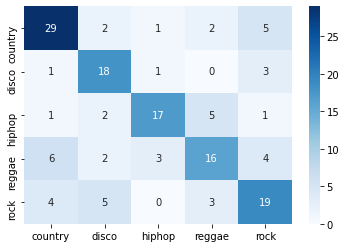

In [61]:
import seaborn as sns
%matplotlib inline
classes=['country', 'disco', 'hiphop', 'reggae', 'rock']
sns.heatmap(cf_matrix, annot=True , cmap='Blues',xticklabels=classes,yticklabels=classes)